In [143]:
import pandas as pd
import numpy as np
import yfinance as yf
from pyhhmm.gaussian import GaussianHMM
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt

In [144]:
#get the data
start_date = "2017-01-1"
end_date = "2022-06-1"
symbol = "SPY"
tickerData = yf.Ticker(symbol)
data = tickerData.history(period='1d', start=start_date, end=end_date)
data = data[["Open", "High", "Low", "Close", "Volume"]]
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03 00:00:00-05:00,199.642111,200.342959,198.613038,199.819550,91366500
2017-01-04 00:00:00-05:00,200.156670,201.159144,200.147804,201.008331,78744400
2017-01-05 00:00:00-05:00,200.733314,201.008325,200.032465,200.848633,78379000
2017-01-06 00:00:00-05:00,200.963937,202.046250,200.405034,201.567200,71559900
2017-01-09 00:00:00-05:00,201.301066,201.443012,200.866362,200.901855,46939700


In [145]:
# add more data to df (returns and range)
df = data.copy()
df["Returns"] = (df["Close"] / df["Close"].shift(1)) - 1
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)
print("Length: ", len(df))
df.head()

Length:  1361


,Open,High,Low,Close,Volume,Returns,Range
Date,,,,,,,
2017-01-04 00:00:00-05:00,200.156670,201.159144,200.147804,201.008331,78744400,0.005949,0.005053
2017-01-05 00:00:00-05:00,200.733314,201.008325,200.032465,200.848633,78379000,-0.000794,0.004879
2017-01-06 00:00:00-05:00,200.963937,202.046250,200.405034,201.567200,71559900,0.003578,0.008189
2017-01-09 00:00:00-05:00,201.301066,201.443012,200.866362,200.901855,46939700,-0.003301,0.002871
2017-01-10 00:00:00-05:00,200.919589,201.780116,200.502631,200.901855,63771900,0.000000,0.006371


In [146]:
# add moving averages
df["MA_8"] = df["Close"].rolling(window=8).mean()
df["MA_16"] = df["Close"].rolling(window=16).mean()

In [147]:
# Structure Data
train_data = df[["Returns", "Range"]].iloc[:500]
test_data = df[["Returns", "Range"]].iloc[500:]
save_df = df.iloc[500:]

In [148]:
#train the model
model = GaussianHMM(n_states=4, covariance_type='full', n_emissions=2)
model.train([np.array(train_data.values)])
model.predict([train_data.values])

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 2, 2, 0,
        0, 0, 1, 1, 1, 1, 3, 0, 0, 0, 

In [149]:
# predict on the test data
df_main = save_df.copy()
df_main.drop(columns=["High", "Low"], inplace=True)

hmm_results = model.predict([test_data.values])[0]
df_main["HMM"] = hmm_results

In [150]:
#ma signal
df_main.loc[df_main["MA_8"] > df_main["MA_16"], "MA_Signal"] = 1
df_main.loc[df_main["MA_8"] <= df_main["MA_16"], "MA_Signal"] = 0

In [151]:
#hmm signal
favourable_states = [0, 1]
hmm_values = df_main["HMM"].values
hmm_values = [1 if x in favourable_states else 0 for x in hmm_values]
df_main["HMM_Signal"] = hmm_values

In [152]:
df_main["Main_Signal"] = 0
df_main.loc[(df_main["MA_Signal"] == 1) & (df_main["HMM_Signal"] == 1), "Main_Signal"] = 1
df_main["Main_Signal"] = df_main["Main_Signal"].shift(1)

In [153]:
df_main["lrets_bench"] = np.log(df_main["Close"] / df_main["Close"].shift(1))
df_main["bench_prod"] = df_main["lrets_bench"].cumsum()
df_main["bench_prod_exp"] = np.exp(df_main["bench_prod"]) - 1

In [154]:
df_main["lrets_strat"] = np.log(df_main["Open"].shift(-1) / df_main["Open"]) * df_main["Main_Signal"]
df_main["lrets_strat"].fillna(0, inplace=True)
df_main["lrets_prod"] = df_main["lrets_strat"].cumsum()
df_main["strat_prod_exp"] = np.exp(df_main["lrets_prod"]) - 1

In [155]:
def sharpe_ratio(returns_series):
    N = 255
    NSQRT = np.sqrt(N)
    rf = 0.01
    mean = returns_series.mean() * N
    sigma = returns_series.std() * NSQRT
    sharpe_ratio = round((mean - rf) / sigma, 2)
    return sharpe_ratio

In [156]:
bench_sharpe = sharpe_ratio(df_main["Returns"])
strat_sharpe = sharpe_ratio(df_main["lrets_strat"])
print("Returns Benchmark: {:.1f}%".format(df_main["Returns"].cumsum()[-1] * 100))
print("Returns Strategy: {:.1f}%".format(df_main["strat_prod_exp"].iloc[-1] * 100))
print("Sharpe Benchmark: {:.2f}".format(bench_sharpe))
print("Sharpe Strategy: {:.2f}".format(strat_sharpe))


Returns Benchmark: 64.9%
Returns Strategy: 63.7%
Sharpe Benchmark: 0.82
Sharpe Strategy: 1.13


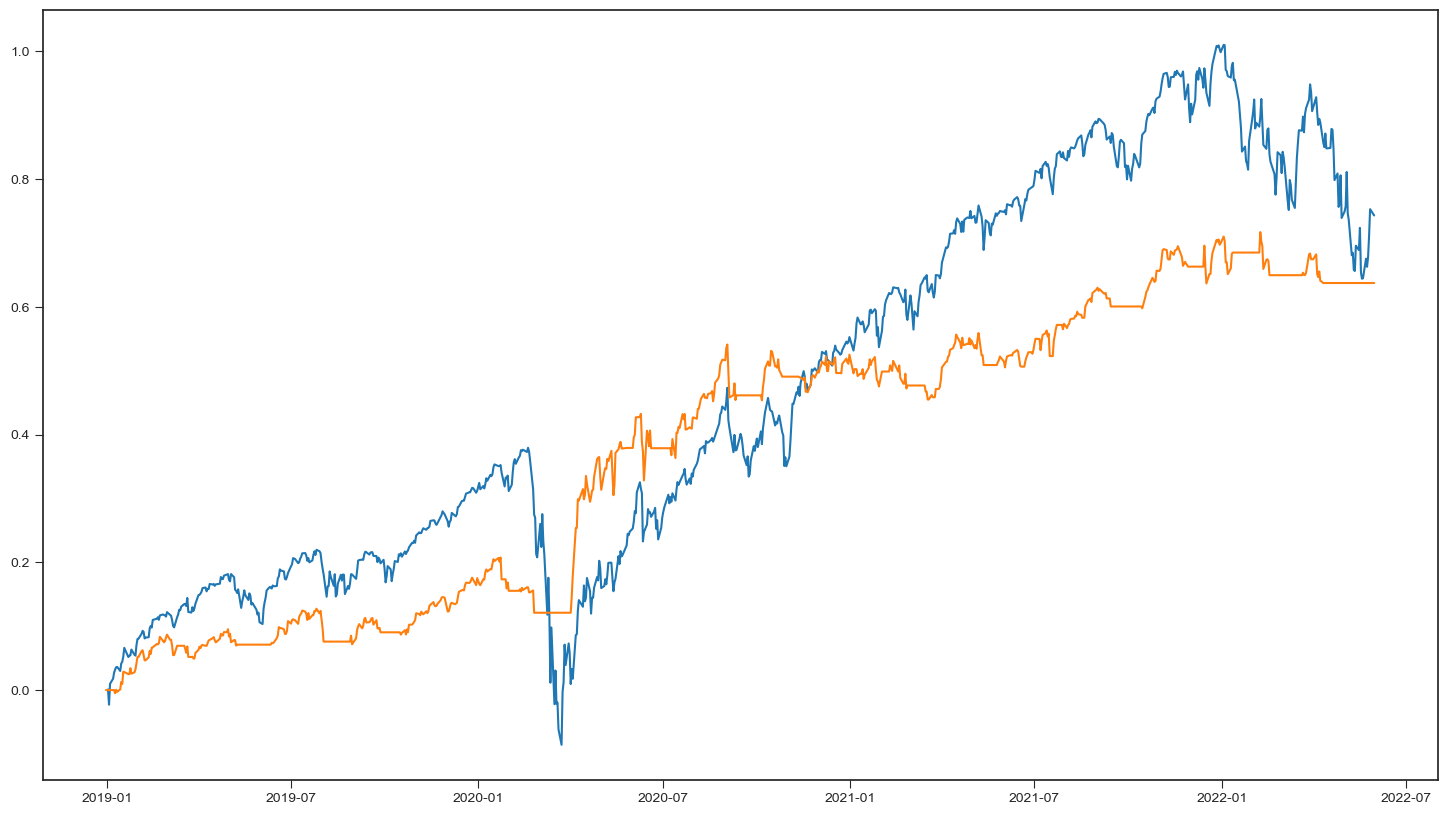

In [157]:
fig = plt.figure(figsize = (18, 10))
plt.plot(df_main["bench_prod_exp"])
plt.plot(df_main["strat_prod_exp"])
plt.show()

In [158]:
# Save Data
df_main.to_csv("data/HMM-SPY.csv")